In [1]:
import pandas as pd
import numpy as np

In [2]:
bank = pd.read_csv('^NSEBANK.csv')

In [3]:
bank.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-12,38719.601563,38851.449219,38604.601563,38727.550781,38727.550781,156100.0
1,2022-01-13,38717.550781,38717.550781,38376.148438,38469.949219,38469.949219,159200.0
2,2022-01-14,38302.351563,38448.050781,38007.750000,38370.398438,38370.398438,148600.0
3,2022-01-17,38212.550781,38617.500000,38138.250000,38216.148438,38216.148438,140300.0
4,2022-01-18,38337.398438,38855.550781,38095.398438,38210.300781,38210.300781,168800.0


In [4]:
#Understanding the dimensions of the datasets.
bank.shape

(250, 7)

In [5]:
#Statistics for the data.
bank.describe()

,Open,High,Low,Close,Adj Close,Volume
count,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,38135.409678,38425.672111,37831.713636,38138.261021,38138.261021,7.417858e+06
std,3121.510770,3077.880823,3138.981348,3110.253420,3110.253420,1.139376e+08
min,32393.449219,32889.800781,32155.349609,32617.099609,32617.099609,0.000000e+00
25%,35621.148438,35806.351563,35203.851563,35527.101563,35527.101563,1.481000e+05
50%,38081.250000,38283.398438,37632.300781,37989.250000,37989.250000,1.823000e+05
75%,40685.601563,41159.199219,40377.898438,40784.050781,40784.050781,2.342000e+05
max,44078.601563,44151.800781,43987.949219,44049.101563,44049.101563,1.798102e+09


In [6]:
#Date Ranges available within the data.
print(bank['Date'].max())
print(bank['Date'].min())

2023-01-12
2022-01-12


# The idea is to formulate the closing price as function of open,high,low and volume of stock. Rather than treating it as time series, we will treat it as factors of these 4 independent variables.

In [7]:
#visualizing data 
import matplotlib.pyplot as plt
import seaborn as sb

## We want to plot the average price for stock versus open prices

In [8]:
#Computing average values for stock
bank['mean_prices'] = (bank['High']+bank['Low'])/2
bank.head()

,Date,Open,High,Low,Close,Adj Close,Volume,mean_prices
0,2022-01-12,38719.601563,38851.449219,38604.601563,38727.550781,38727.550781,156100.0,38728.025391
1,2022-01-13,38717.550781,38717.550781,38376.148438,38469.949219,38469.949219,159200.0,38546.849610
2,2022-01-14,38302.351563,38448.050781,38007.750000,38370.398438,38370.398438,148600.0,38227.900390
3,2022-01-17,38212.550781,38617.500000,38138.250000,38216.148438,38216.148438,140300.0,38377.875000
4,2022-01-18,38337.398438,38855.550781,38095.398438,38210.300781,38210.300781,168800.0,38475.474610


In [9]:
bank['Date'] = pd.to_datetime(bank['Date'])

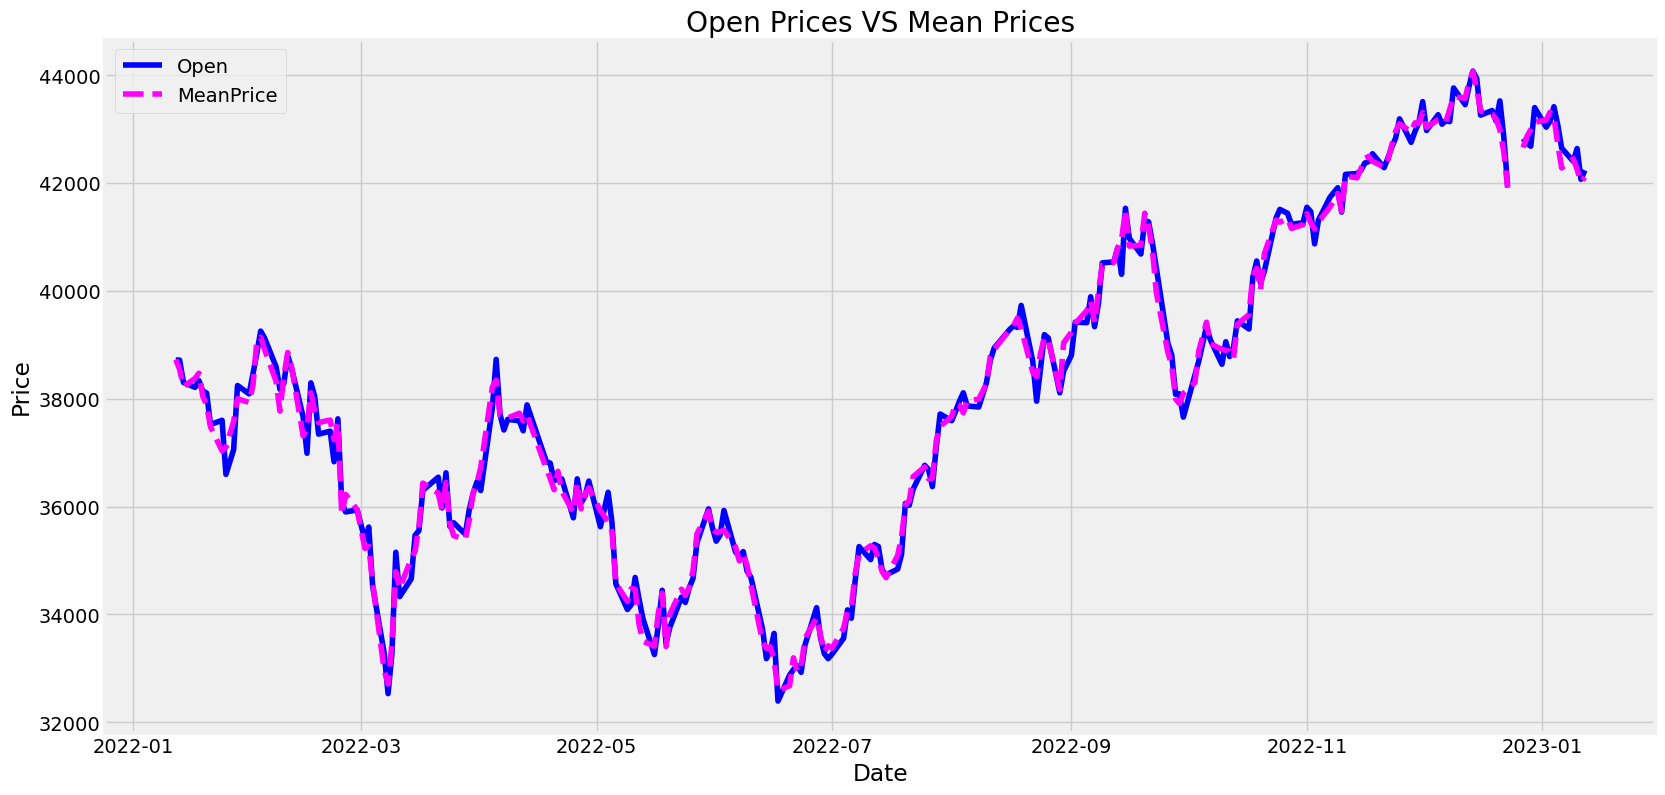

In [10]:
plt.figure(figsize=(20,9))
plt.style.use('fivethirtyeight')
plt.title('Open Prices VS Mean Prices')
plt.plot(bank['Date'],bank['Open'],linestyle='solid',label='Open',color='blue')
plt.plot(bank['Date'],bank['mean_prices'],linestyle='dashed',color='magenta',label='MeanPrice')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

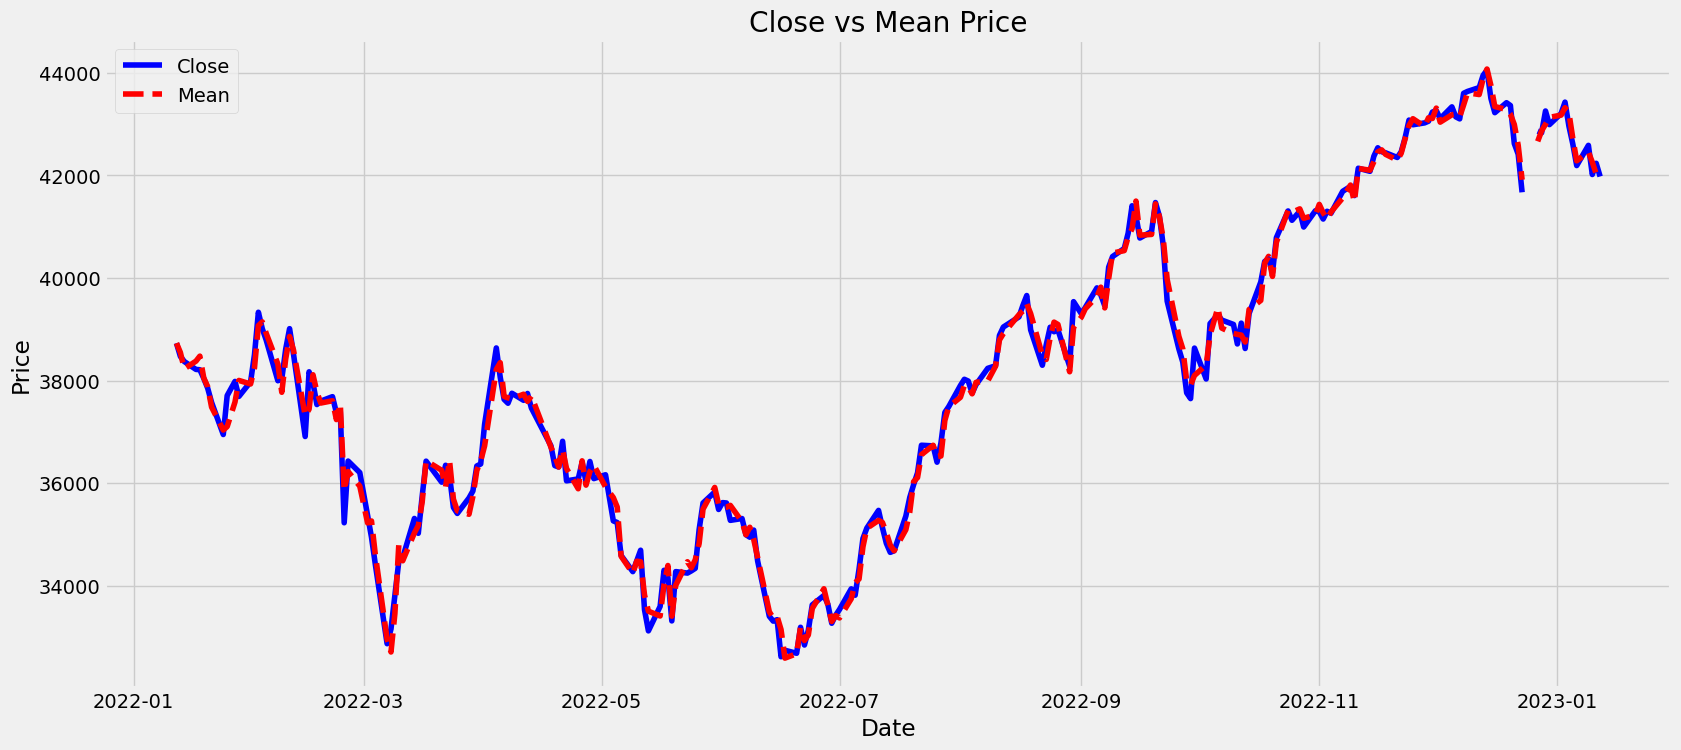

In [11]:
plt.figure(figsize=(18,8))
plt.style.use('fivethirtyeight')
plt.plot(bank['Date'],bank['Close'],linestyle='solid',color='blue',label='Close')
plt.plot(bank['Date'],bank['mean_prices'],linestyle='dashed',color='red',label='Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close vs Mean Price')
plt.legend()
plt.show()

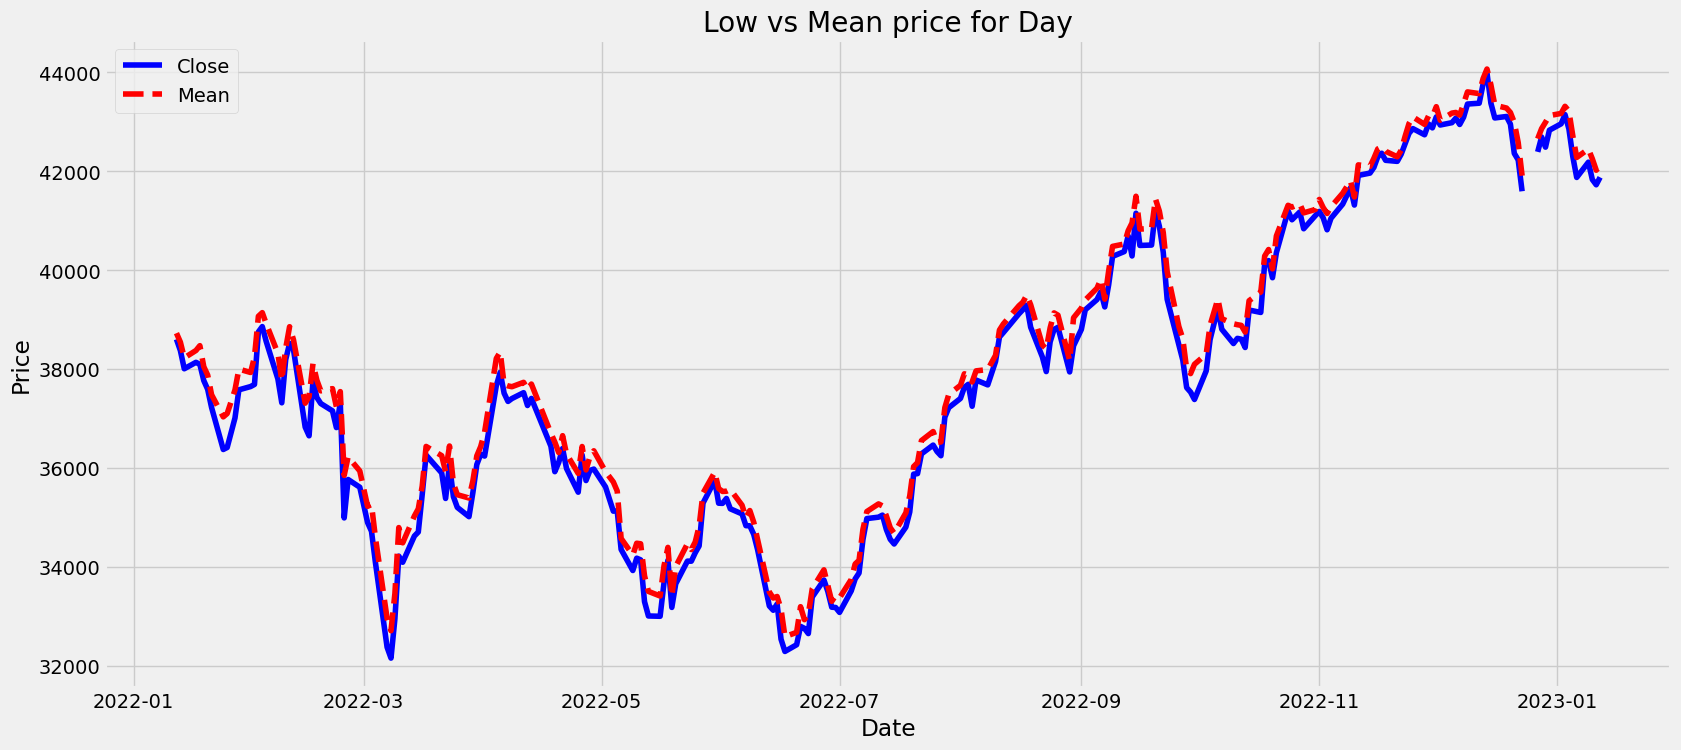

In [12]:
#Low pric for day vs mean price for day.
plt.figure(figsize=(18,8))
plt.style.use('fivethirtyeight')
plt.plot(bank['Date'],bank['Low'],linestyle='solid',color='blue',label='Close')
plt.plot(bank['Date'],bank['mean_prices'],linestyle='dashed',color='red',label='Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Low vs Mean price for Day')
plt.legend()
plt.show()

In [13]:
bank.dropna(inplace=True)

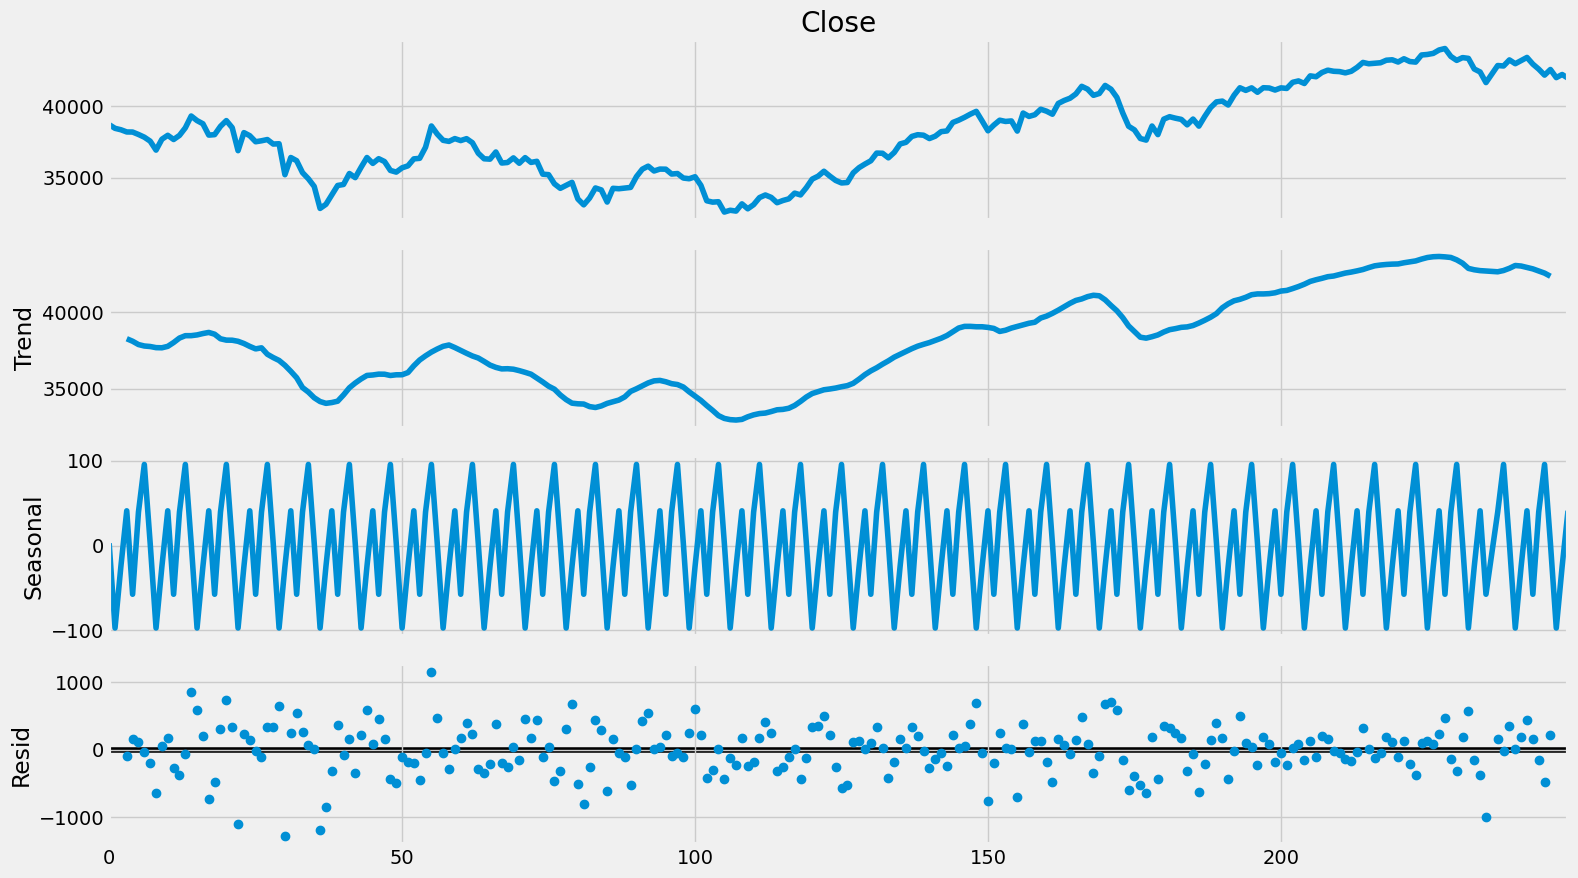

In [14]:
import statsmodels.api
decomposition_model = statsmodels.tsa.seasonal.seasonal_decompose(bank['Close'],model='additive',period=7)
fig = decomposition_model.plot()
fig.set_size_inches(16,9)
fig.tight_layout()
plt.show()

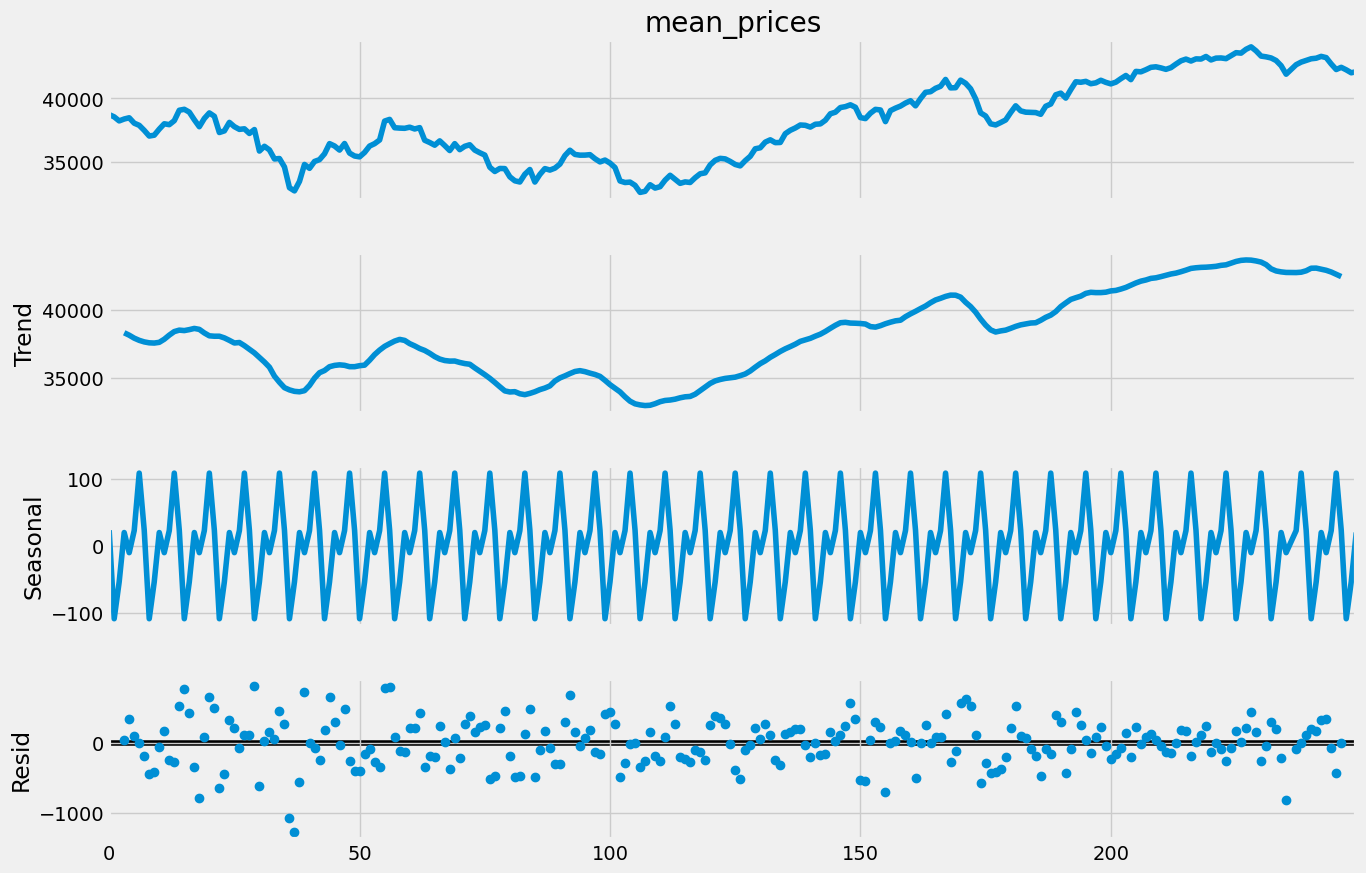

In [15]:
decompose_mean = statsmodels.tsa.seasonal.seasonal_decompose(bank['mean_prices'],model='additive',period=7)
fig1 = decompose_mean.plot()
fig1.set_size_inches(16,10)
plt.show()

In [16]:
bank.isna().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
mean_prices    0
dtype: int64

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
#Training our model for close prices.
from sklearn.model_selection import train_test_split
X = bank.drop(['Adj Close','Volume','mean_prices','High','Low','Open','Date'],axis=1)
Y = bank[['Close']]
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.25,random_state=10)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(186, 1)
(63, 1)
(186, 1)
(63, 1)


In [19]:
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
xtest = np.array(xtest)
ytest = np.array(ytest)

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [21]:
X_train = []
Y_train = []
window_size = 7
for i in range(len(xtrain) - window_size+1):
    # Create a window of size 7 in xtrain
    x_window = xtrain_scaled[i:i+window_size,0]
    
    # Get the corresponding label from ytrain
    y_label = xtrain_scaled[i+window_size-1,0]

    # Append the window to X_train
    X_train.append(x_window)
    
    # Append the label to Y_train
    Y_train.append(y_label)

In [22]:
x_train = np.array(X_train)

In [23]:
x_train.shape

(180, 7)

In [24]:
len(Y_train)

180

In [25]:
#Reshaping data before fitting it to LSTM
x_train_reshape = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))

In [26]:
x_train_reshape.shape

(180, 7, 1)

In [27]:
#Creating window for test set
X_test = []
Y_test = []
for i in range(len(xtest) - window_size+1):
    # Create a window of size 7 in xtest
    x_window = xtest_scaled[i:i + window_size,0]
    
    # Get the corresponding label from ytest
    y_label = xtest_scaled[i + window_size -1,0]

    # Append the window to X_test
    X_test.append(x_window)
    
    # Append the label to Y_test
    Y_test.append(y_label)

In [28]:
x_test = np.array(X_test)

In [29]:
x_test.shape

(57, 7)

In [30]:
#creating test set 
x_test_reshape = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test_reshape.shape)

(57, 7, 1)


## Creating a LSTM model using close values as input for forecasting it in future.

In [31]:
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
model = keras.Sequential()
model.add(layers.LSTM(256,return_sequences = True , input_shape = (x_train_reshape.shape[1],1)))
model.add(layers.LSTM(128, return_sequences=False))
model.add(layers.Dense(64))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()         

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 256)            264192    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 469633 (1.79 MB)
Trainable params: 469633 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
model.fit(x_train, np.array(Y_train), batch_size=1, epochs=10)

Epoch 1/10
180/180 [==============================] - 10s 16ms/step - loss: 0.0764 - accuracy: 0.0056
Epoch 2/10
180/180 [==============================] - 3s 19ms/step - loss: 0.0289 - accuracy: 0.0111
Epoch 3/10
180/180 [==============================] - 2s 13ms/step - loss: 0.0012 - accuracy: 0.0111
Epoch 4/10
180/180 [==============================] - 3s 14ms/step - loss: 8.7985e-04 - accuracy: 0.0111
Epoch 5/10
180/180 [==============================] - 3s 14ms/step - loss: 0.0012 - accuracy: 0.0111
Epoch 6/10
180/180 [==============================] - 2s 14ms/step - loss: 0.0012 - accuracy: 0.0111
Epoch 7/10
180/180 [==============================] - 2s 13ms/step - loss: 0.0012 - accuracy: 0.0111
Epoch 8/10
180/180 [==============================] - 2s 13ms/step - loss: 0.0013 - accuracy: 0.0111
Epoch 9/10
180/180 [==============================] - 2s 13ms/step - loss: 0.0011 - accuracy: 0.0111
Epoch 10/10
180/180 [==============================] - 2s 13ms/step - loss: 0.0017 - a

In [34]:
pred_train = model.predict(x_train)
pred_train = scaler.inverse_transform(pred_train)

6/6 [==============================] - 2s 14ms/step


In [35]:
pred_train

array([[42847.164],
       [35944.176],
       [36020.22 ],
       [34054.645],
       [39804.7  ],
       [35972.695],
       [34971.945],
       [37345.95 ],
       [42011.27 ],
       [34668.77 ],
       [42093.645],
       [39404.633],
       [34009.23 ],
       [36354.56 ],
       [42502.023],
       [42302.684],
       [38386.508],
       [34560.36 ],
       [37278.22 ],
       [35719.383],
       [42745.176],
       [35951.12 ],
       [40436.39 ],
       [42566.367],
       [39745.074],
       [36498.902],
       [42706.426],
       [42417.684],
       [42212.215],
       [34981.61 ],
       [41098.91 ],
       [35578.555],
       [42625.895],
       [38684.27 ],
       [38530.605],
       [39865.973],
       [33913.977],
       [42326.56 ],
       [35206.996],
       [42666.54 ],
       [35448.965],
       [42931.06 ],
       [41173.895],
       [34325.625],
       [38102.4  ],
       [41376.273],
       [34963.41 ],
       [35333.29 ],
       [42760.97 ],
       [35905.305],


In [36]:
rmse_train = np.sqrt(np.mean(pred_train - np.array(Y_train)**2))
rmse_train

195.16159957822254

In [37]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - np.array(Y_test)**2))
rmse

2/2 [==============================] - 0s 13ms/step


195.73861516576818

In [38]:
predictions

array([[41310.5  ],
       [35473.266],
       [42636.61 ],
       [35350.555],
       [40633.848],
       [39198.785],
       [42652.45 ],
       [42325.25 ],
       [37514.625],
       [42940.176],
       [36589.75 ],
       [39647.414],
       [42355.68 ],
       [34554.203],
       [37305.305],
       [42565.297],
       [37981.97 ],
       [38962.21 ],
       [35940.945],
       [38635.785],
       [37890.46 ],
       [34522.574],
       [42790.258],
       [34093.793],
       [37186.836],
       [41743.742],
       [34139.203],
       [42253.434],
       [38646.418],
       [37719.797],
       [41585.613],
       [37877.25 ],
       [34626.695],
       [33609.086],
       [38544.055],
       [33951.957],
       [37509.234],
       [34795.203],
       [42227.984],
       [38453.99 ],
       [37608.64 ],
       [39437.258],
       [39629.523],
       [37616.227],
       [39233.28 ],
       [35789.348],
       [40617.703],
       [36121.332],
       [34876.03 ],
       [40999.926],


In [39]:
predicted_values = pd.DataFrame(zip(predictions,ytest),columns=['Pred_price','True_price'])
predicted_values.head()

,Pred_price,True_price
0,[41310.5],[38067.898438]
1,[35473.266],[35358.699219]
2,[42636.61],[37613.800781]
3,[35350.555],[39038.5]
4,[40633.848],[32743.050781]


In [40]:
predicted_values.dropna(inplace=True)

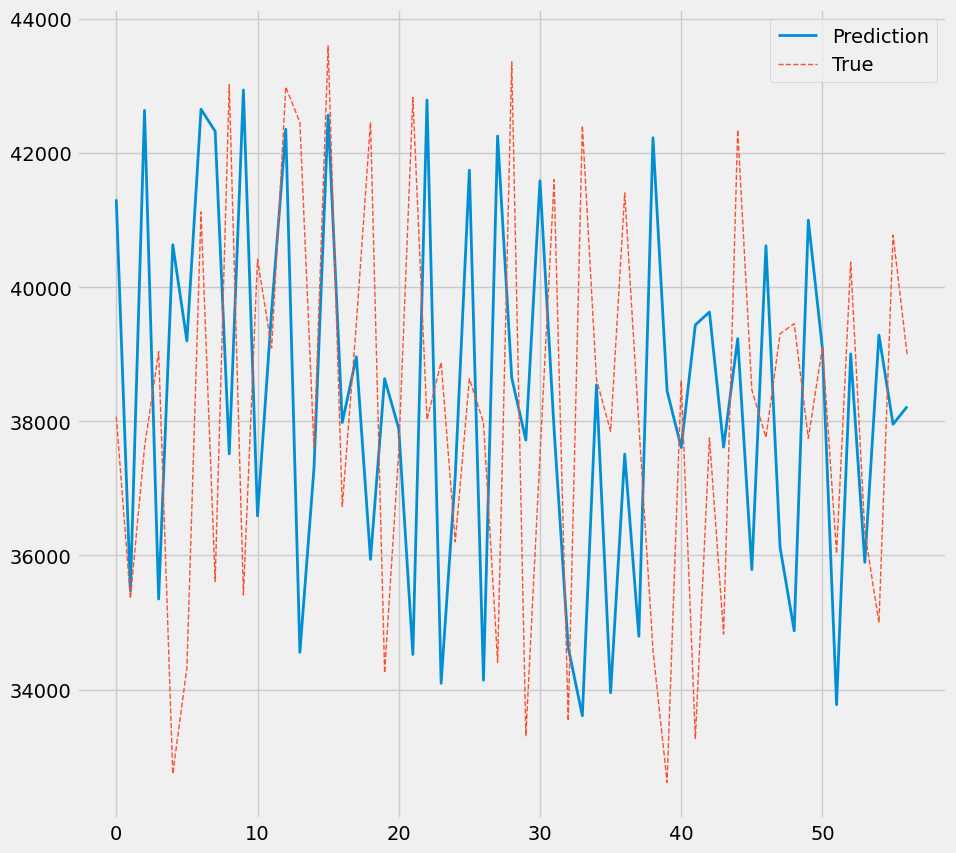

In [41]:
plt.figure(figsize=(10,10))
plt.plot(predicted_values['Pred_price'],linestyle='solid',linewidth=2,label='Prediction')
plt.plot(predicted_values['True_price'],linestyle='dashed',linewidth=1,label='True')
plt.legend()
plt.show()

## Creating LSTM network for forecasting close price assuming close price is function of Volume,Open,High,Low.

In [152]:
X = bank[['Volume','Open','High','Low']]
Y = bank['Close']

In [153]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=11)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(174, 4)
(75, 4)
(174,)
(75,)


In [42]:
xtrain = np.array(xtrain)
xtest = np.array(xtest)
ytrain = np.array(ytrain)
ytest = np.array(ytest)

In [43]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
xtrain_std = std.fit_transform(xtrain)
xtest_std = std.transform(xtest)

In [71]:
#Standardizing target column.
standard = StandardScaler()
ytrain_std = standard.fit_transform(ytrain)
ytest_std = standard.transform(ytest)

In [86]:
#Creating window of 7 days for train set.
X_train = []
Y_train = []
for i in range(len(xtrain)-window_size+1):
    x_window = xtrain_std[i: i + window_size,0]
    y_label = ytrain_std[i,0]
    X_train.append(x_window)
    Y_train.append(y_label)

In [87]:
x_train = np.array(X_train)
y_train = np.array(Y_train)

In [88]:
#Creating window of 7 days for test set.
X_test = []
Y_test = []
for i in range(len(xtest) - window_size + 1):
    x_window = xtest_std[i: i + window_size,0]
    y_label = ytest_std[i,0]
    X_test.append(x_window)
    Y_test.append(y_label)

In [89]:
x_test = np.array(X_test)
y_test = np.array(Y_test)

In [90]:
#reshaping the data before passing it to LSTM.
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [91]:
print(x_train.shape)
print(x_test.shape)

(180, 7, 1)
(57, 7, 1)


In [92]:
model = keras.Sequential()
model.add(layers.LSTM(256,input_shape=(x_train.shape[1],1),return_sequences = True))
model.add(layers.LSTM(128,return_sequences=False))
model.add(layers.Dense(64))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 7, 256)            264192    
                                                                 
 lstm_7 (LSTM)               (None, 128)               197120    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 469633 (1.79 MB)
Trainable params: 469633 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=1,epochs=30)

Epoch 1/30
180/180 [==============================] - 6s 15ms/step - loss: 0.5054
Epoch 2/30
180/180 [==============================] - 3s 15ms/step - loss: 0.2890
Epoch 3/30
180/180 [==============================] - 3s 15ms/step - loss: 0.2079
Epoch 4/30
180/180 [==============================] - 3s 15ms/step - loss: 0.1870
Epoch 5/30
180/180 [==============================] - 3s 15ms/step - loss: 0.2406
Epoch 6/30
180/180 [==============================] - 3s 16ms/step - loss: 0.1371
Epoch 7/30
180/180 [==============================] - 3s 15ms/step - loss: 0.1468
Epoch 8/30
180/180 [==============================] - 3s 14ms/step - loss: 0.0853
Epoch 9/30
180/180 [==============================] - 3s 14ms/step - loss: 0.0936
Epoch 10/30
180/180 [==============================] - 3s 14ms/step - loss: 0.0475
Epoch 11/30
180/180 [==============================] - 3s 14ms/step - loss: 0.0523
Epoch 12/30
180/180 [==============================] - 3s 15ms/step - loss: 0.0528
Epoch 13/30
1

In [94]:
predictions = model.predict(x_train)
estimated_predictions = std.inverse_transform(predictions)

6/6 [==============================] - 1s 13ms/step


In [95]:
estimated_predictions.shape

(180, 1)

In [97]:
true_value = standard.inverse_transform(y_train.reshape(-1,1))

In [98]:
true_value.shape

(180, 1)

In [99]:
rmse = np.sqrt(np.mean(true_value-estimated_predictions)**2)
rmse

16.11480053472092

In [100]:
new_dataframe = pd.DataFrame(zip(true_value,estimated_predictions),columns=['True','Estimated'])
new_dataframe.head()

,True,Estimated
0,[41209.199219],[41202.32]
1,[34301.898438],[34220.516]
2,[41783.199219],[41875.613]
3,[38370.398438],[38350.516]
4,[41304.898438],[41363.28]


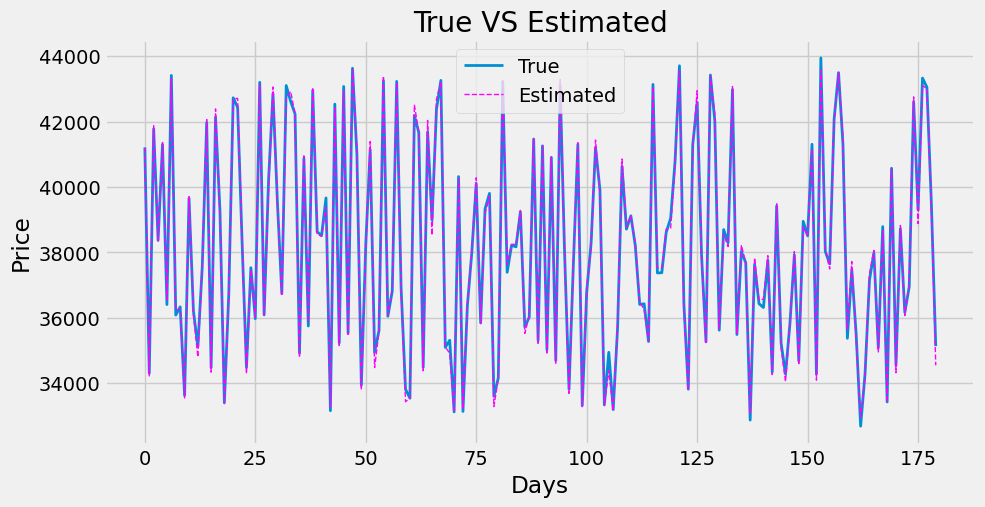

In [103]:
plt.figure(figsize=(10,5))
plt.plot(new_dataframe['True'],linestyle='solid',linewidth=2,label='True')
plt.plot(new_dataframe['Estimated'],linestyle='dashed',color='magenta',linewidth=1,label='Estimated')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('True VS Estimated')
plt.show()

In [113]:
#test set 
predictions_test = model.predict(x_test)
estimated_test = std.inverse_transform(predictions_test)

2/2 [==============================] - 0s 12ms/step


In [115]:
estimated_test.shape

(57, 1)

In [106]:
true_test = standard.inverse_transform(y_test.reshape(-1,1))

In [116]:
test_dataframe = pd.DataFrame(zip(estimated_test,true_test),columns=['Estimated','True'])
test_dataframe.head()

,Estimated,True
0,[38289.54],[38067.898438]
1,[35278.32],[35358.699219]
2,[37781.91],[37613.800781]
3,[38847.945],[39038.5]
4,[32811.26],[32743.050781]


In [117]:
rmse_test = np.sqrt(np.mean(true_test - estimated_test)**2)
rmse_test

10.43218871052765

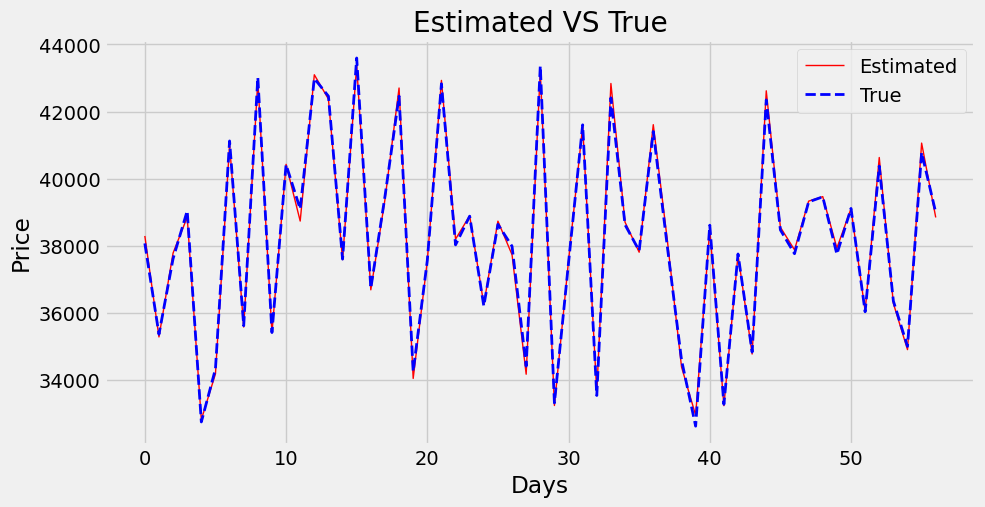

In [119]:
#plotting the values for test set.
plt.figure(figsize=(10,5))
plt.plot(test_dataframe['Estimated'],color='r',linestyle='solid',linewidth=1,label='Estimated')
plt.plot(test_dataframe['True'],color='b',linestyle='dashed',linewidth=2,label='True')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Estimated VS True')
plt.show()